<a href="https://colab.research.google.com/github/sandeeproyy/ML-Notes/blob/main/LR_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np

In [15]:
class Linear_Regression( ):

  # intiating the parameters (learning rate & no of iterations)
  def __init__(self, learning_rate, n_iters):

    self.learning_rate = learning_rate
    self.n_iters = n_iters


  def fit(self, X, Y):

    # no of training exaples and no of features
    self.m, self.n = X.shape   # no of rows(n) and columns(m)

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # Implementing Gradient Descent

    for i in range(self.n_iters):
      self.update_weights()

  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    # updating the weights

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):

    return X.dot(self.w) + self.b

Using this Model for Prediction:

In [2]:
 import pandas as pd
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split


In [3]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_data.shape

(30, 2)

In [8]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [9]:
# Splitting the feature and target
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [10]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [12]:
# splitting the DS into training and tetsing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=3)  # i fw random state

Training the Model

In [35]:
model = Linear_Regression(learning_rate=0.01, n_iters=1000)

In [36]:
model.fit(X_train, Y_train)

In [37]:
print('weight = ', model.w[0])
print('Bias = ', model.b)

weight =  9514.643177316906
Bias =  26120.128262880113


y = 9514(x) + 26120

Predict the salary using test data

In [38]:
test_data_predicition = model.predict(X_test)

In [39]:
print(test_data_predicition)

[ 72741.87983173  53712.5934771  101285.80936368 116509.23844739
  82256.52300905  68936.02256081  65130.16528988  40392.09302886
  74644.8084672   38489.16439339]


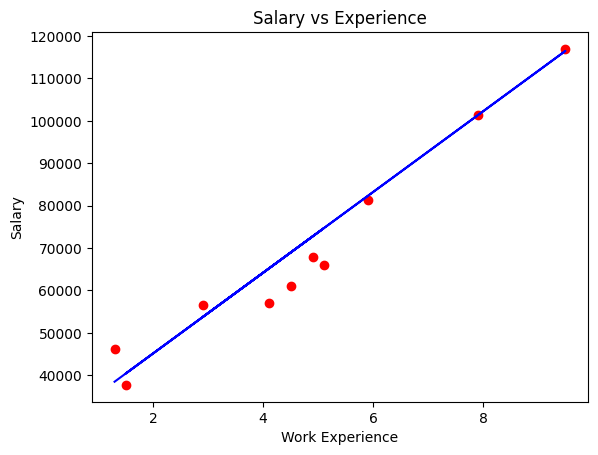

In [40]:
# Visualising the predicted values and actual values
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_predicition, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()